In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [6]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/28/20', '12/29/20', '12/30/20', '12/31/20', '1/1/21', '1/2/21',
       '1/3/21', '1/4/21', '1/5/21', '1/6/21'],
      dtype='object', length=355)

In [7]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [8]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [9]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [10]:
days_since_1_1 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-30]
print(future_forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [12]:
start = '1/12/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [13]:
def prediction(x):
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, x, test_size=0.2, shuffle=False)
    # transform data for polynomial regression
    poly = PolynomialFeatures(degree=2)
    poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
    poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
    poly_future_forecast = poly.fit_transform(future_forecast)

    # polynomial regression
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
    test_linear_pred = linear_model.predict(poly_X_test_confirmed)
    global linear_pred
    linear_pred = linear_model.predict(poly_future_forecast)
    print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
    print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

    plt.plot(y_test_confirmed)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data', 'Polynomial Regression Predictions'])
    print(linear_model.score(poly_X_test_confirmed,y_test_confirmed))

    linear_pred = linear_pred.reshape(1,-1)[0]
    poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-20:])})
    print(poly_df)
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

# Cases Prediction

MAE: 7885732.519345671
MSE: 80382711990970.98
0.49990383105364067
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           77543209.0
1   01/08/2021                           78022451.0
2   01/09/2021                           78503168.0
3   01/10/2021                           78985359.0
4   01/11/2021                           79469025.0
5   01/12/2021                           79954165.0
6   01/13/2021                           80440779.0
7   01/14/2021                           80928868.0
8   01/15/2021                           81418431.0
9   01/16/2021                           81909468.0
10  01/17/2021                           82401980.0
11  01/18/2021                           82895966.0
12  01/19/2021                           83391427.0
13  01/20/2021                           83888362.0
14  01/21/2021                           84386771.0
15  01/22/2021                           84886655.0
16  01/23/2021                           85388013.

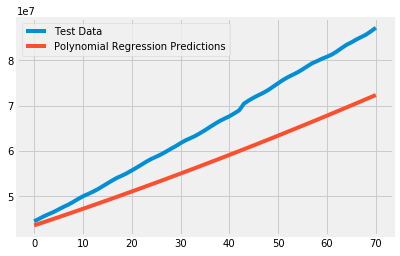

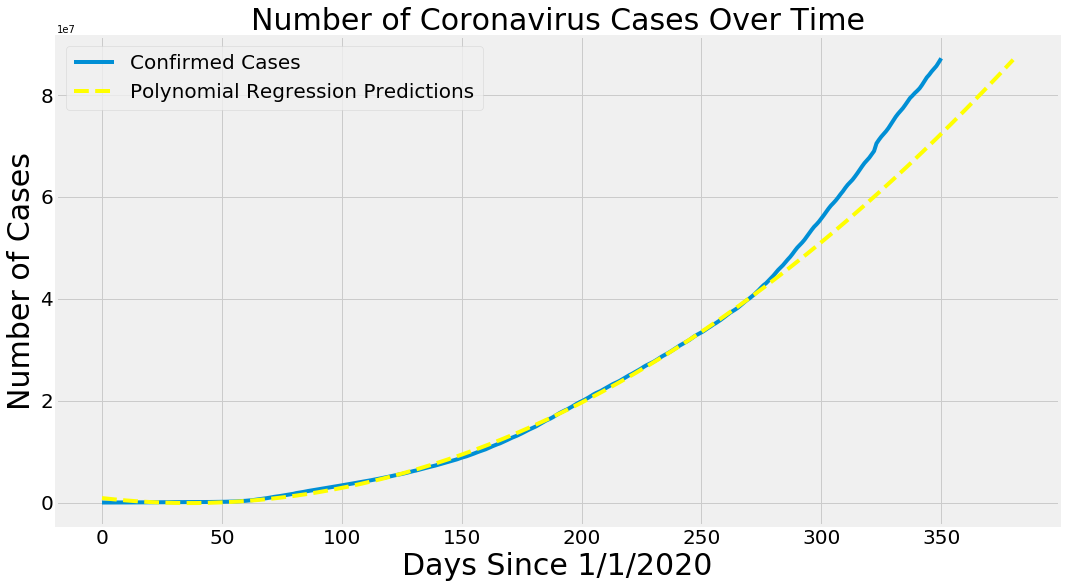

In [14]:
prediction(world_cases)
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 2033102.3216066915
MSE: 5993056003600.169
-11.048899434982541
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           16407077.0
1   01/08/2021                           16526801.0
2   01/09/2021                           16646950.0
3   01/10/2021                           16767521.0
4   01/11/2021                           16888516.0
5   01/12/2021                           17009935.0
6   01/13/2021                           17131777.0
7   01/14/2021                           17254043.0
8   01/15/2021                           17376732.0
9   01/16/2021                           17499845.0
10  01/17/2021                           17623381.0
11  01/18/2021                           17747341.0
12  01/19/2021                           17871724.0
13  01/20/2021                           17996530.0
14  01/21/2021                           18121760.0
15  01/22/2021                           18247414.0
16  01/23/2021                           18373491

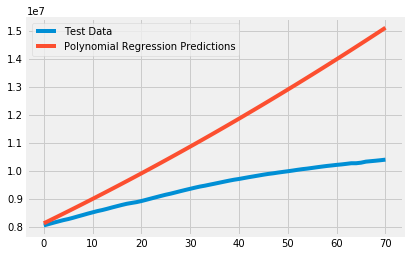

In [15]:
prediction(india_cases)

MAE: 2865654.101233908
MSE: 13180782828137.453
0.0735329739603039
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           15164310.0
1   01/08/2021                           15248427.0
2   01/09/2021                           15332774.0
3   01/10/2021                           15417350.0
4   01/11/2021                           15502155.0
5   01/12/2021                           15587190.0
6   01/13/2021                           15672454.0
7   01/14/2021                           15757948.0
8   01/15/2021                           15843672.0
9   01/16/2021                           15929624.0
10  01/17/2021                           16015807.0
11  01/18/2021                           16102219.0
12  01/19/2021                           16188860.0
13  01/20/2021                           16275731.0
14  01/21/2021                           16362831.0
15  01/22/2021                           16450161.0
16  01/23/2021                           16537720.

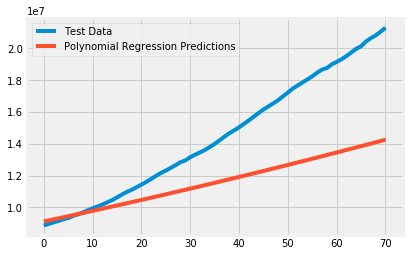

In [16]:
prediction(us_cases)

MAE: 24730.168550088212
MSE: 702091366.1204435
-249.0835247240904
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              48564.0
1   01/08/2021                              48041.0
2   01/09/2021                              47516.0
3   01/10/2021                              46987.0
4   01/11/2021                              46456.0
5   01/12/2021                              45921.0
6   01/13/2021                              45384.0
7   01/14/2021                              44843.0
8   01/15/2021                              44300.0
9   01/16/2021                              43753.0
10  01/17/2021                              43204.0
11  01/18/2021                              42651.0
12  01/19/2021                              42096.0
13  01/20/2021                              41537.0
14  01/21/2021                              40975.0
15  01/22/2021                              40411.0
16  01/23/2021                              39843.

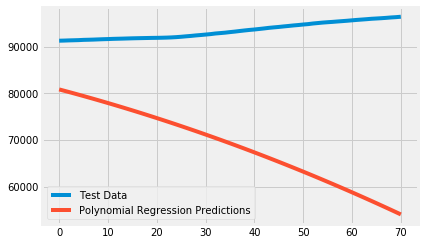

In [22]:
prediction(china_cases)

MAE: 1143715.8355919404
MSE: 1360067940027.253
-8.461365814671362
          Date  Predicted number of Confirmed Cases
0   01/07/2021                            1479286.0
1   01/08/2021                            1488752.0
2   01/09/2021                            1498249.0
3   01/10/2021                            1507776.0
4   01/11/2021                            1517334.0
5   01/12/2021                            1526923.0
6   01/13/2021                            1536543.0
7   01/14/2021                            1546193.0
8   01/15/2021                            1555874.0
9   01/16/2021                            1565586.0
10  01/17/2021                            1575328.0
11  01/18/2021                            1585102.0
12  01/19/2021                            1594905.0
13  01/20/2021                            1604740.0
14  01/21/2021                            1614605.0
15  01/22/2021                            1624502.0
16  01/23/2021                            1634428.

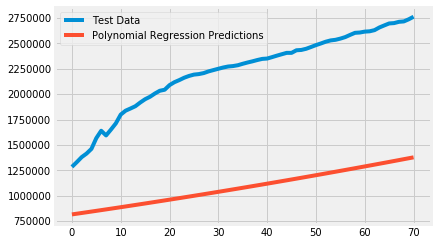

In [23]:
prediction(france_cases)

MAE: 773529.239755035
MSE: 747770857420.4407
-3.5052385016449668
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             419988.0
1   01/08/2021                             420934.0
2   01/09/2021                             421878.0
3   01/10/2021                             422821.0
4   01/11/2021                             423762.0
5   01/12/2021                             424702.0
6   01/13/2021                             425639.0
7   01/14/2021                             426576.0
8   01/15/2021                             427510.0
9   01/16/2021                             428444.0
10  01/17/2021                             429375.0
11  01/18/2021                             430305.0
12  01/19/2021                             431234.0
13  01/20/2021                             432160.0
14  01/21/2021                             433086.0
15  01/22/2021                             434009.0
16  01/23/2021                             434931.0

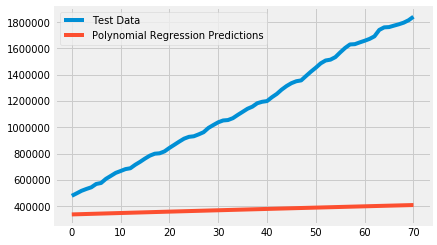

In [24]:
prediction(germany_cases)

MAE: 964051.5612128396
MSE: 1095688643069.3032
-3.6126220729499705
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             948292.0
1   01/08/2021                             952691.0
2   01/09/2021                             957100.0
3   01/10/2021                             961518.0
4   01/11/2021                             965946.0
5   01/12/2021                             970383.0
6   01/13/2021                             974830.0
7   01/14/2021                             979286.0
8   01/15/2021                             983753.0
9   01/16/2021                             988228.0
10  01/17/2021                             992713.0
11  01/18/2021                             997208.0
12  01/19/2021                            1001712.0
13  01/20/2021                            1006226.0
14  01/21/2021                            1010750.0
15  01/22/2021                            1015283.0
16  01/23/2021                            1019826

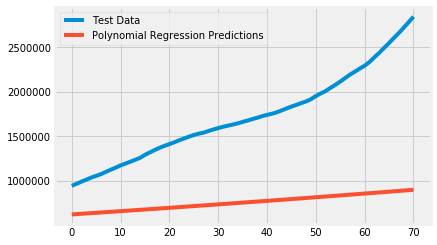

In [25]:
prediction(uk_cases)

MAE: 445012.88027711946
MSE: 203697760973.59076
-2.9284555724585215
          Date  Predicted number of Confirmed Cases
0   01/07/2021                            1572281.0
1   01/08/2021                            1581601.0
2   01/09/2021                            1590949.0
3   01/10/2021                            1600325.0
4   01/11/2021                            1609730.0
5   01/12/2021                            1619163.0
6   01/13/2021                            1628624.0
7   01/14/2021                            1638113.0
8   01/15/2021                            1647630.0
9   01/16/2021                            1657176.0
10  01/17/2021                            1666750.0
11  01/18/2021                            1676352.0
12  01/19/2021                            1685983.0
13  01/20/2021                            1695641.0
14  01/21/2021                            1705328.0
15  01/22/2021                            1715043.0
16  01/23/2021                            172478

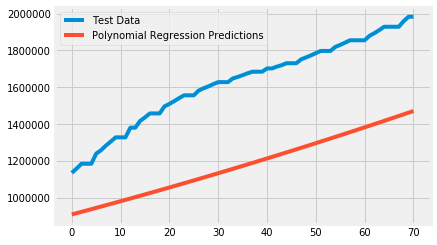

In [26]:
prediction(spain_cases)

MAE: 507427.4641041714
MSE: 352150132661.486
-0.29919628947474575
          Date  Predicted number of Confirmed Cases
0   01/07/2021                            2354624.0
1   01/08/2021                            2366263.0
2   01/09/2021                            2377929.0
3   01/10/2021                            2389622.0
4   01/11/2021                            2401341.0
5   01/12/2021                            2413087.0
6   01/13/2021                            2424860.0
7   01/14/2021                            2436659.0
8   01/15/2021                            2448485.0
9   01/16/2021                            2460337.0
10  01/17/2021                            2472217.0
11  01/18/2021                            2484123.0
12  01/19/2021                            2496055.0
13  01/20/2021                            2508014.0
14  01/21/2021                            2520000.0
15  01/22/2021                            2532013.0
16  01/23/2021                            2544052.

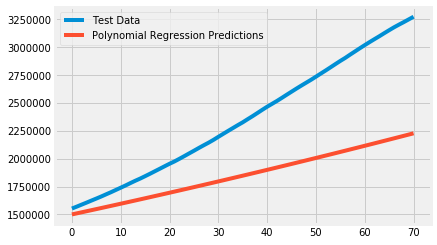

In [27]:
prediction(russia_cases)

MAE: 1154866.3096546782
MSE: 1550384256929.1865
-5.83009583781069
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             402586.0
1   01/08/2021                             402893.0
2   01/09/2021                             403194.0
3   01/10/2021                             403490.0
4   01/11/2021                             403781.0
5   01/12/2021                             404068.0
6   01/13/2021                             404349.0
7   01/14/2021                             404626.0
8   01/15/2021                             404897.0
9   01/16/2021                             405164.0
10  01/17/2021                             405425.0
11  01/18/2021                             405682.0
12  01/19/2021                             405934.0
13  01/20/2021                             406181.0
14  01/21/2021                             406423.0
15  01/22/2021                             406660.0
16  01/23/2021                             406892.

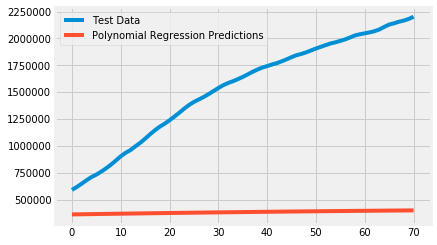

In [28]:
prediction(italy_cases)

# Recoveries Prediction

MAE: 1636697.1709544389
MSE: 4865022876239.915
0.8431526591807135
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           56875985.0
1   01/08/2021                           57252745.0
2   01/09/2021                           57630737.0
3   01/10/2021                           58009961.0
4   01/11/2021                           58390418.0
5   01/12/2021                           58772107.0
6   01/13/2021                           59155028.0
7   01/14/2021                           59539181.0
8   01/15/2021                           59924567.0
9   01/16/2021                           60311186.0
10  01/17/2021                           60699036.0
11  01/18/2021                           61088119.0
12  01/19/2021                           61478434.0
13  01/20/2021                           61869982.0
14  01/21/2021                           62262762.0
15  01/22/2021                           62656774.0
16  01/23/2021                           63052018.

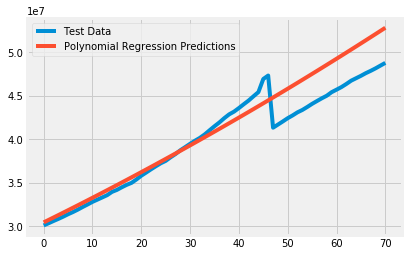

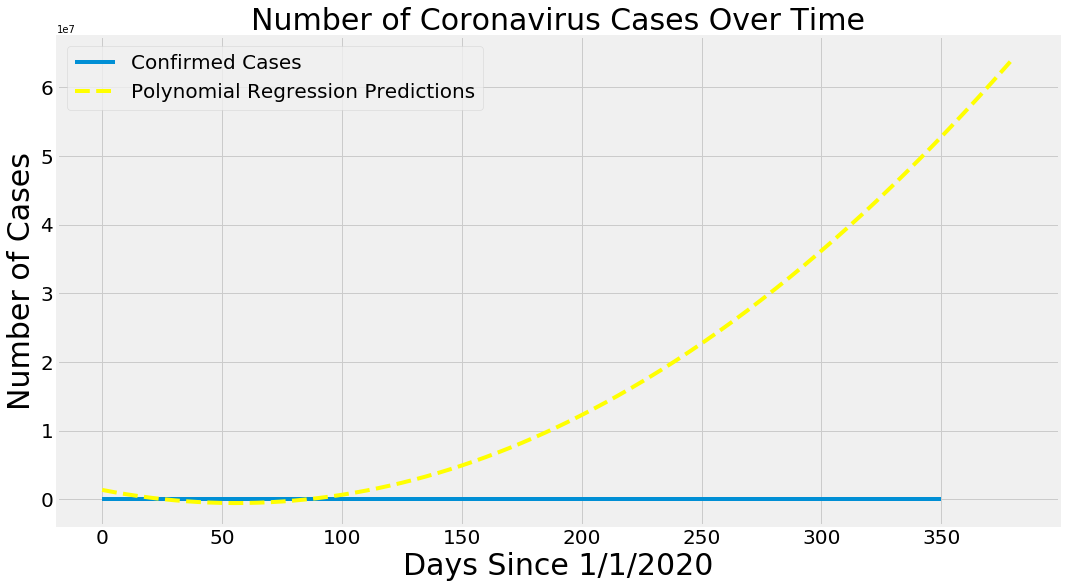

In [29]:
prediction(total_recovered)
plot_predictions(adjusted_dates, recovery_rate, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 1083782.8963120119
MSE: 2020891433929.2773
-2.1852083536419786
          Date  Predicted number of Confirmed Cases
0   01/07/2021                           14252877.0
1   01/08/2021                           14359564.0
2   01/09/2021                           14466636.0
3   01/10/2021                           14574093.0
4   01/11/2021                           14681934.0
5   01/12/2021                           14790161.0
6   01/13/2021                           14898772.0
7   01/14/2021                           15007768.0
8   01/15/2021                           15117148.0
9   01/16/2021                           15226913.0
10  01/17/2021                           15337063.0
11  01/18/2021                           15447598.0
12  01/19/2021                           15558518.0
13  01/20/2021                           15669822.0
14  01/21/2021                           15781511.0
15  01/22/2021                           15893585.0
16  01/23/2021                           1600604

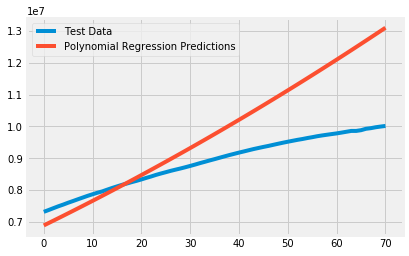

In [56]:
prediction(india_recoveries)

MAE: 875.5658829741104
MSE: 1316956.5304101673
-0.4044714410911745
          Date  Predicted number of Confirmed Cases
0   01/07/2021                               3567.0
1   01/08/2021                               3580.0
2   01/09/2021                               3593.0
3   01/10/2021                               3605.0
4   01/11/2021                               3618.0
5   01/12/2021                               3631.0
6   01/13/2021                               3643.0
7   01/14/2021                               3656.0
8   01/15/2021                               3669.0
9   01/16/2021                               3682.0
10  01/17/2021                               3695.0
11  01/18/2021                               3707.0
12  01/19/2021                               3720.0
13  01/20/2021                               3733.0
14  01/21/2021                               3746.0
15  01/22/2021                               3759.0
16  01/23/2021                               3771

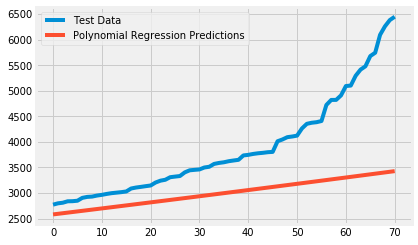

In [57]:
prediction(uk_recoveries)

MAE: 2129965.300973545
MSE: 11161446709228.287
-1.1309536965330973
          Date  Predicted number of Confirmed Cases
0   01/07/2021                            6614094.0
1   01/08/2021                            6655999.0
2   01/09/2021                            6698036.0
3   01/10/2021                            6740204.0
4   01/11/2021                            6782503.0
5   01/12/2021                            6824934.0
6   01/13/2021                            6867496.0
7   01/14/2021                            6910190.0
8   01/15/2021                            6953015.0
9   01/16/2021                            6995971.0
10  01/17/2021                            7039059.0
11  01/18/2021                            7082278.0
12  01/19/2021                            7125628.0
13  01/20/2021                            7169110.0
14  01/21/2021                            7212723.0
15  01/22/2021                            7256468.0
16  01/23/2021                            7300343

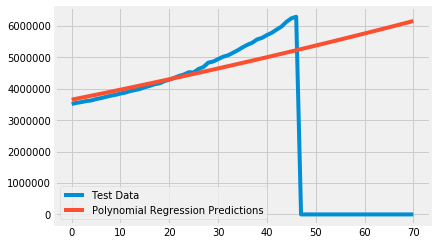

In [31]:
prediction(us_recoveries)

MAE: 36591.21747105885
MSE: 1661207830.1491582
0.0
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              66149.0
1   01/08/2021                              64864.0
2   01/09/2021                              63571.0
3   01/10/2021                              62269.0
4   01/11/2021                              60958.0
5   01/12/2021                              59639.0
6   01/13/2021                              58310.0
7   01/14/2021                              56973.0
8   01/15/2021                              55626.0
9   01/16/2021                              54271.0
10  01/17/2021                              52907.0
11  01/18/2021                              51534.0
12  01/19/2021                              50153.0
13  01/20/2021                              48762.0
14  01/21/2021                              47363.0
15  01/22/2021                              45954.0
16  01/23/2021                              44537.0
17  01/24/202

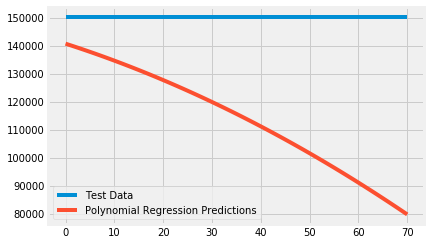

In [32]:
prediction(spain_recoveries)

MAE: 517519.15188946354
MSE: 382039507042.2761
-2.0795873098284763
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             341127.0
1   01/08/2021                             341709.0
2   01/09/2021                             342287.0
3   01/10/2021                             342863.0
4   01/11/2021                             343436.0
5   01/12/2021                             344007.0
6   01/13/2021                             344575.0
7   01/14/2021                             345141.0
8   01/15/2021                             345703.0
9   01/16/2021                             346264.0
10  01/17/2021                             346821.0
11  01/18/2021                             347376.0
12  01/19/2021                             347928.0
13  01/20/2021                             348478.0
14  01/21/2021                             349025.0
15  01/22/2021                             349570.0
16  01/23/2021                             350112

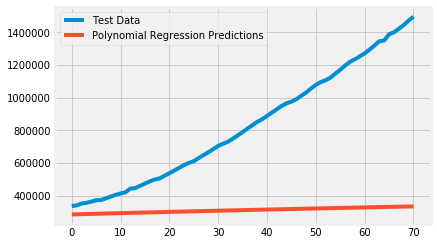

In [33]:
prediction(germany_recoveries)

MAE: 56347.61557487944
MSE: 3745071038.674671
-4.5628392983017
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             113396.0
1   01/08/2021                             113403.0
2   01/09/2021                             113408.0
3   01/10/2021                             113411.0
4   01/11/2021                             113413.0
5   01/12/2021                             113412.0
6   01/13/2021                             113409.0
7   01/14/2021                             113405.0
8   01/15/2021                             113398.0
9   01/16/2021                             113389.0
10  01/17/2021                             113379.0
11  01/18/2021                             113366.0
12  01/19/2021                             113351.0
13  01/20/2021                             113335.0
14  01/21/2021                             113316.0
15  01/22/2021                             113295.0
16  01/23/2021                             113273.0
1

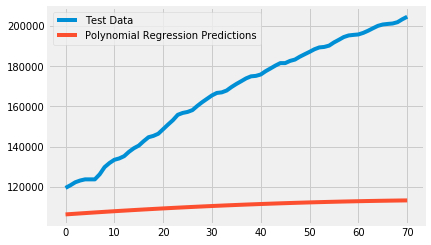

In [34]:
prediction(france_recoveries)

MAE: 575013.3909526602
MSE: 508354437288.2632
-1.7546143330919755
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             286420.0
1   01/08/2021                             286633.0
2   01/09/2021                             286842.0
3   01/10/2021                             287046.0
4   01/11/2021                             287247.0
5   01/12/2021                             287444.0
6   01/13/2021                             287637.0
7   01/14/2021                             287825.0
8   01/15/2021                             288010.0
9   01/16/2021                             288191.0
10  01/17/2021                             288368.0
11  01/18/2021                             288541.0
12  01/19/2021                             288710.0
13  01/20/2021                             288875.0
14  01/21/2021                             289036.0
15  01/22/2021                             289193.0
16  01/23/2021                             289346.

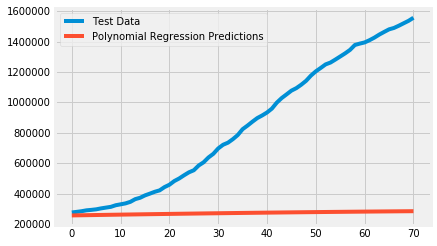

In [35]:
prediction(italy_recoveries)

MAE: 33955.596407203084
MSE: 1323723860.7496126
-746.9565970848381
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              23475.0
1   01/08/2021                              22689.0
2   01/09/2021                              21899.0
3   01/10/2021                              21105.0
4   01/11/2021                              20305.0
5   01/12/2021                              19502.0
6   01/13/2021                              18693.0
7   01/14/2021                              17880.0
8   01/15/2021                              17063.0
9   01/16/2021                              16240.0
10  01/17/2021                              15414.0
11  01/18/2021                              14582.0
12  01/19/2021                              13746.0
13  01/20/2021                              12906.0
14  01/21/2021                              12061.0
15  01/22/2021                              11211.0
16  01/23/2021                              10357

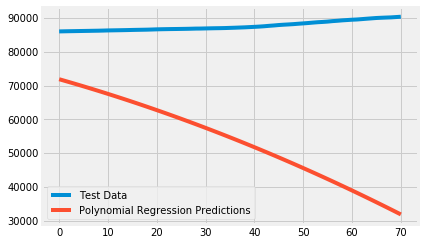

In [36]:
prediction(china_recoveries)

# Deaths Prediction

MAE: 54306.520195146586
MSE: 4574579519.231254
0.8982038107438343
          Date  Predicted number of Confirmed Cases
0   01/07/2021                            1831214.0
1   01/08/2021                            1839533.0
2   01/09/2021                            1847868.0
3   01/10/2021                            1856220.0
4   01/11/2021                            1864588.0
5   01/12/2021                            1872974.0
6   01/13/2021                            1881376.0
7   01/14/2021                            1889794.0
8   01/15/2021                            1898230.0
9   01/16/2021                            1906682.0
10  01/17/2021                            1915151.0
11  01/18/2021                            1923637.0
12  01/19/2021                            1932139.0
13  01/20/2021                            1940658.0
14  01/21/2021                            1949194.0
15  01/22/2021                            1957747.0
16  01/23/2021                            1966316.

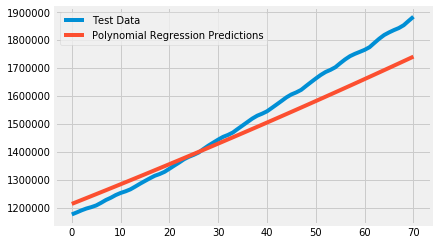

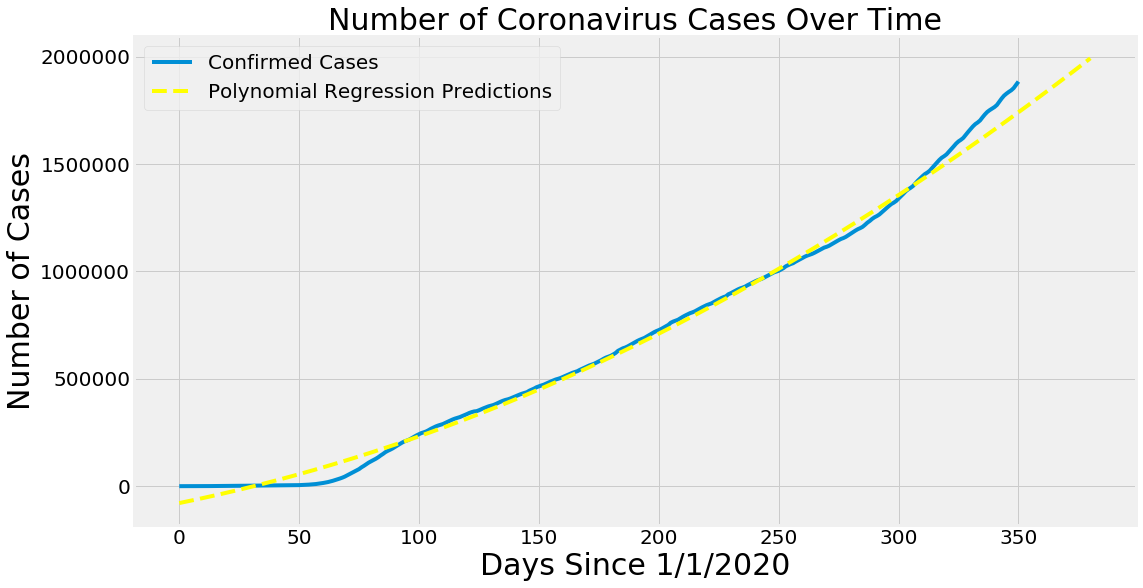

In [37]:
prediction(total_deaths)
plot_predictions(adjusted_dates, total_deaths, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 37162.19385307898
MSE: 1803920369.87895
-21.19661417098543
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             245582.0
1   01/08/2021                             247287.0
2   01/09/2021                             248997.0
3   01/10/2021                             250713.0
4   01/11/2021                             252435.0
5   01/12/2021                             254163.0
6   01/13/2021                             255896.0
7   01/14/2021                             257635.0
8   01/15/2021                             259380.0
9   01/16/2021                             261131.0
10  01/17/2021                             262888.0
11  01/18/2021                             264650.0
12  01/19/2021                             266418.0
13  01/20/2021                             268192.0
14  01/21/2021                             269972.0
15  01/22/2021                             271757.0
16  01/23/2021                             273549.0


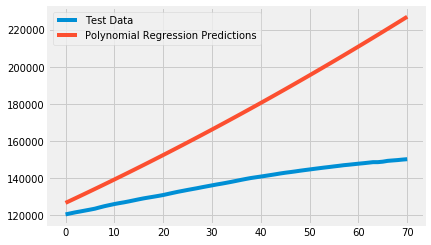

In [48]:
prediction(india_deaths)

MAE: 17918.97940208147
MSE: 600332701.3991492
0.6254942293081319
          Date  Predicted number of Confirmed Cases
0   01/07/2021                             313456.0
1   01/08/2021                             314401.0
2   01/09/2021                             315345.0
3   01/10/2021                             316290.0
4   01/11/2021                             317234.0
5   01/12/2021                             318179.0
6   01/13/2021                             319124.0
7   01/14/2021                             320068.0
8   01/15/2021                             321012.0
9   01/16/2021                             321957.0
10  01/17/2021                             322901.0
11  01/18/2021                             323845.0
12  01/19/2021                             324790.0
13  01/20/2021                             325734.0
14  01/21/2021                             326678.0
15  01/22/2021                             327622.0
16  01/23/2021                             328566.0

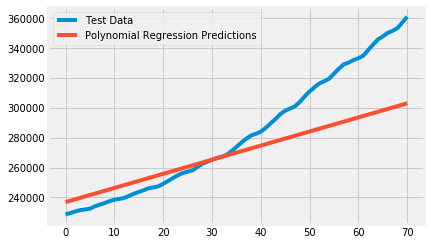

In [49]:
prediction(us_deaths)

MAE: 21448.2420588043
MSE: 604200275.5804853
-6.241613145105209
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              30428.0
1   01/08/2021                              30199.0
2   01/09/2021                              29968.0
3   01/10/2021                              29735.0
4   01/11/2021                              29500.0
5   01/12/2021                              29264.0
6   01/13/2021                              29025.0
7   01/14/2021                              28785.0
8   01/15/2021                              28542.0
9   01/16/2021                              28298.0
10  01/17/2021                              28051.0
11  01/18/2021                              27803.0
12  01/19/2021                              27553.0
13  01/20/2021                              27301.0
14  01/21/2021                              27047.0
15  01/22/2021                              26791.0
16  01/23/2021                              26533.0


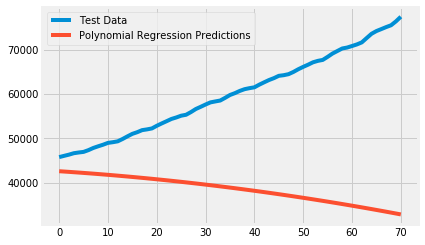

In [50]:
prediction(uk_deaths)

MAE: 17980.738262771356
MSE: 374958064.6703091
-15.245205777403946
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              20123.0
1   01/08/2021                              19937.0
2   01/09/2021                              19750.0
3   01/10/2021                              19562.0
4   01/11/2021                              19372.0
5   01/12/2021                              19180.0
6   01/13/2021                              18987.0
7   01/14/2021                              18793.0
8   01/15/2021                              18597.0
9   01/16/2021                              18400.0
10  01/17/2021                              18202.0
11  01/18/2021                              18002.0
12  01/19/2021                              17800.0
13  01/20/2021                              17597.0
14  01/21/2021                              17393.0
15  01/22/2021                              17187.0
16  01/23/2021                              16979

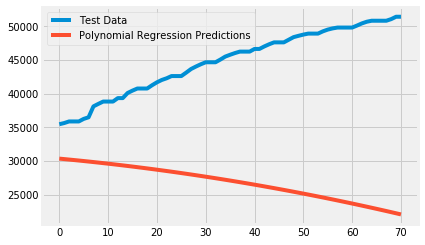

In [51]:
prediction(spain_deaths)

MAE: 11537.486965574186
MSE: 213149346.50974232
-2.150142337575849
          Date  Predicted number of Confirmed Cases
0   01/07/2021                               6347.0
1   01/08/2021                               6291.0
2   01/09/2021                               6234.0
3   01/10/2021                               6177.0
4   01/11/2021                               6120.0
5   01/12/2021                               6062.0
6   01/13/2021                               6003.0
7   01/14/2021                               5945.0
8   01/15/2021                               5885.0
9   01/16/2021                               5826.0
10  01/17/2021                               5765.0
11  01/18/2021                               5705.0
12  01/19/2021                               5644.0
13  01/20/2021                               5582.0
14  01/21/2021                               5520.0
15  01/22/2021                               5458.0
16  01/23/2021                               5395

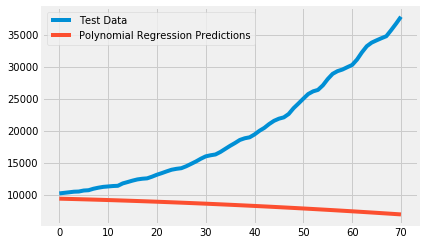

In [52]:
prediction(germany_deaths)

MAE: 25548.002051259387
MSE: 796327036.4014571
-8.179381664528531
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              19612.0
1   01/08/2021                              19407.0
2   01/09/2021                              19201.0
3   01/10/2021                              18993.0
4   01/11/2021                              18783.0
5   01/12/2021                              18572.0
6   01/13/2021                              18360.0
7   01/14/2021                              18146.0
8   01/15/2021                              17930.0
9   01/16/2021                              17713.0
10  01/17/2021                              17494.0
11  01/18/2021                              17274.0
12  01/19/2021                              17052.0
13  01/20/2021                              16828.0
14  01/21/2021                              16603.0
15  01/22/2021                              16377.0
16  01/23/2021                              16148.

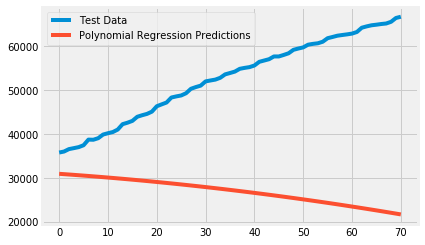

In [53]:
prediction(france_deaths)

MAE: 29491.147142464208
MSE: 1145013963.8262122
-6.261951984144355
          Date  Predicted number of Confirmed Cases
0   01/07/2021                              16617.0
1   01/08/2021                              16327.0
2   01/09/2021                              16034.0
3   01/10/2021                              15740.0
4   01/11/2021                              15444.0
5   01/12/2021                              15145.0
6   01/13/2021                              14845.0
7   01/14/2021                              14543.0
8   01/15/2021                              14238.0
9   01/16/2021                              13932.0
10  01/17/2021                              13624.0
11  01/18/2021                              13313.0
12  01/19/2021                              13001.0
13  01/20/2021                              12687.0
14  01/21/2021                              12370.0
15  01/22/2021                              12052.0
16  01/23/2021                              11732

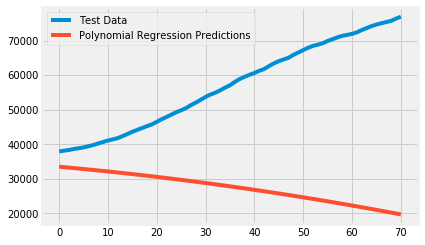

In [54]:
prediction(italy_deaths)

MAE: 1595.836708066508
MSE: 2936535.511478562
-12749.697708765168
          Date  Predicted number of Confirmed Cases
0   01/07/2021                               1588.0
1   01/08/2021                               1547.0
2   01/09/2021                               1506.0
3   01/10/2021                               1464.0
4   01/11/2021                               1423.0
5   01/12/2021                               1381.0
6   01/13/2021                               1339.0
7   01/14/2021                               1297.0
8   01/15/2021                               1254.0
9   01/16/2021                               1211.0
10  01/17/2021                               1168.0
11  01/18/2021                               1125.0
12  01/19/2021                               1082.0
13  01/20/2021                               1038.0
14  01/21/2021                                994.0
15  01/22/2021                                950.0
16  01/23/2021                                906.

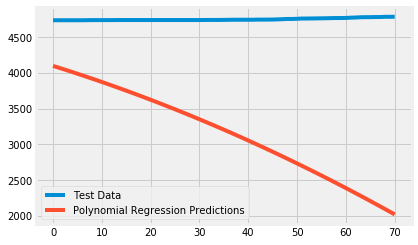

In [55]:
prediction(china_deaths)